In [1]:
import sys; sys.path.append('../code')

import matplotlib.pyplot as plt
plt.rcParams['text.usetex'] = True
plt.rcParams["ps.usedistiller"] = 'xpdf'

In [2]:
import run_analysis_180 as run_analysis
import direct_trajectory_simulator
import matplotlib.pyplot as plt
import utility
import numpy as np
import figurefirst as fifi
import fly_plot_lib.flymath as flymath
import pynumdiff
import pandas
import os
import matplotlib
import fly_plot_lib.plot as fpl

import scipy.interpolate
interp2d = scipy.interpolate.interp2d

import utility



/home/caveman/TEST38/lib/python3.8/site-packages/pynumdiff-0.1.dev0-py3.8.egg/pynumdiff/total_variation_regularization/__total_variation_regularization__.py:12: UserWarning: Could not import cvxpy. Install cvxpy (http://www.cvxpy.org/install/index.html) to use                    convex total variation regularized derivatives.                    Recommended solver: MOSEK, free academic license available: https://www.mosek.com/products/academic-licenses/                    You can still use the iterative method.
/home/caveman/TEST38/lib/python3.8/site-packages/pynumdiff-0.1.dev0-py3.8.egg/pynumdiff/linear_model/__linear_model__.py:22: UserWarning: Could not import pychebfun. Install pychebfun (https://github.com/pychebfun/pychebfun/) to use chebfun derivatives.
/home/caveman/TEST38/lib/python3.8/site-packages/pynumdiff-0.1.dev0-py3.8.egg/pynumdiff/linear_model/__linear_model__.py:26: UserWarning: Could not import pydmd. Install pydmd (florisvb fork: https://github.com/florisvb/PyDMD) to 

probably could not import cvxpy, not an issue if you dont need it here


In [3]:
from plot_utility import plot_timeseries, plot_ground_speed, plot_sensor_data
from plot_utility import plot_example_zeta_timeseries, get_filenames_sorted_by_tau_and_T, load_real_wind
from plot_utility import plot_errors, colorbar, get_error_heatmap_for_Tmultiplier, plot_error_heatmap

In [4]:
fififig = '../figures_svg/fig_8_time_constants.svg'
FONTSIZE = 7

# Colorbar

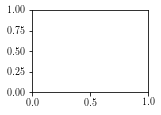

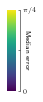

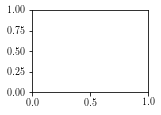

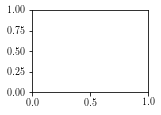

In [5]:
layout = fifi.svg_to_axes.FigureLayout(fififig, 
                                       autogenlayers=True, make_mplfigures=True, hide_layers=[])

ax = layout.axes[('colorbar', 'colorbar')]

colorbar(ax=ax, colormap='viridis', orientation='vertical', ticks=[0, np.pi/4.])

yticks = [0, np.pi/8., np.pi/4.]
fifi.mpl_functions.adjust_spines(ax, ['right'], 
                                     yticks=yticks,
                                     tick_length=2.5,
                                     spine_locations={'right': 4},
                                     linewidth=0.5)

ax.set_ylabel('Median error')
ax.set_ylabel("Median error",rotation=-90, labelpad=-17)

ax.set_yticklabels(['$0$', '', '$\pi/4$'])

fifi.mpl_functions.set_fontsize(ax, FONTSIZE)

layout.append_figure_to_layer(layout.figures['colorbar'], 'colorbar', cleartarget=True)
layout.write_svg(fififig)

In [6]:
windtype = 'realdynamic'
turn_angle = 90
phi_alignment = 'alignpsi'
Tmultiplier = 1
angular_noise_std = 0.3
directory = '../data_simulations/20220301_seed1_absine_alignpsi_realdynamic_vary_omega_T'
#directory = '20220301_90deg_absine_alignpsi_realdynamic'
basename= 'cvx_wind' + windtype + '_random_turnamplitude' + str(turn_angle) + 'deg'

# Heatmap

only finding filenames containing: alignpsi
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
only finding filenames containing: alignpsi
NEED PYTHON 3.8 and MATPLOTLIB 3.5 FOR CORRECT SHADING!!!
[  0.4   2.   10.   50.  250. ] [0.01 0.02 0.1  0.5  1.25] [[1.08329285 1.00587499 0.94233344 0.95929293 1.41427251]
 [1.04992172 0.87528152 0.63446438 0.72165595 0.77323628]
 [0.54384895 0.30718503 0.234

../code/plot_utility.py:427: RuntimeWarning: invalid value encountered in double_scalars
  slope = (p2[1] - p1[1])/(p2[0] - p1[0])


means:  2.026602431267043 -1.1179764414266855
means:  2.0251408734062966 -1.116904682394486
7.577178292370788 0.32729129887151287 0.2108946691086408


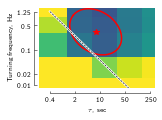

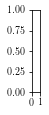

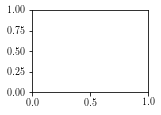

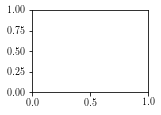

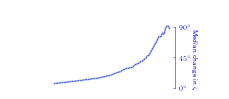

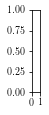

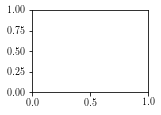

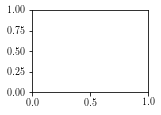

In [7]:
layout = fifi.svg_to_axes.FigureLayout(fififig, 
                                       autogenlayers=True, make_mplfigures=True, hide_layers=[])
ax = layout.axes[('optimal_tau', 'optimal_tau')]




error_heatmap = get_error_heatmap_for_Tmultiplier(directory,  basename, 
                                          angular_noise_std=angular_noise_std,
                                          Tmultiplier=Tmultiplier,
                                          phi_alignment=phi_alignment,
                                          paramX=1)

plot_error_heatmap(error_heatmap, directory, basename, angular_noise_std=angular_noise_std, 
                           Tmultiplier=1, paramX=1, use='median',
                           phi_alignment=phi_alignment,
                               show_xspine=True, show_yspine=True,
                               show_contour=False, ax=ax)
ax.set_xlim(0.2, 350)

layout.append_figure_to_layer(layout.figures['optimal_tau'], 'optimal_tau', cleartarget=True)
layout.write_svg(fififig)





layout = fifi.svg_to_axes.FigureLayout(fififig, 
                                       autogenlayers=True, make_mplfigures=True, hide_layers=[])
ax = layout.axes[('optimal_tau', 'optimal_tau')]

df_real_dynamic_wind = pandas.read_hdf('../data_tmp/df_realdynamic_wind_percentiles.hdf5')
ax.plot(df_real_dynamic_wind.lags, df_real_dynamic_wind.fifty, color='lightsteelblue', linewidth=2)
ax.plot(df_real_dynamic_wind.lags, df_real_dynamic_wind.fifty, '--', color='blue', linewidth=0.5)
ax.set_xscale('log')
ax.set_xlim(0.2, 350)
ax.set_ylim(0, 120)
ax.minorticks_off()

fifi.mpl_functions.adjust_spines(ax, ['right'], 
                                 yticks = [0, 45, 90],
                                 spine_locations={'right': 5, 'bottom': 5},
                                 default_ticks=False,
                                 tick_length=2.5,
                                 linewidth=0.5,
                                 color='blue')

yticklabels = ['$' + str(y) + '^{\circ}$' for y in [0, 45, 90]]
ax.set_yticklabels(yticklabels)
ax.tick_params(axis='y', labelcolor='blue')
ax.set_ylabel('Median change in $\zeta$', color='blue', rotation=270)
ax.yaxis.set_label_coords(1.24, 0.35)
ax.yaxis.set_label_position("right")

fifi.mpl_functions.set_fontsize(ax, FONTSIZE)

layout.append_figure_to_layer(layout.figures['optimal_tau'], 'optimal_tau', cleartarget=False)
layout.write_svg(fififig)

only finding filenames containing: alignpsi
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
only finding filenames containing: alignpsi
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15

../code/plot_utility.py:427: RuntimeWarning: invalid value encountered in double_scalars
  slope = (p2[1] - p1[1])/(p2[0] - p1[0])


7.577302189118236 0.3273247177917956 0.2051452098617068


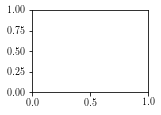

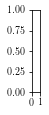

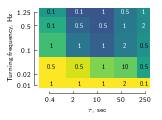

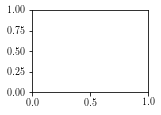

In [8]:
Tmultiplier = 1

# Get heatmap for each paramX option
error_heatmaps = []
paramX_options = [0.1, 0.5, 1, 2, 10]
for paramX in paramX_options:
    error_heatmap = get_error_heatmap_for_Tmultiplier(directory,  basename, 
                                              angular_noise_std=angular_noise_std,
                                              Tmultiplier=Tmultiplier,
                                              phi_alignment=phi_alignment,
                                              paramX=paramX)
    error_heatmaps.append(error_heatmap)

# Get the best paramX option and assocated heatmap
best = np.zeros_like(error_heatmaps[0])
opt = np.argmin(error_heatmaps, axis=0)

for i in range(best.shape[0]):
    for j in range(best.shape[1]):
        best[i,j] = error_heatmaps[opt[i,j]][i,j]

# get axes
layout = fifi.svg_to_axes.FigureLayout(fififig, 
                                       autogenlayers=True, make_mplfigures=True, hide_layers=[])
ax = layout.axes[('optimal_omega', 'optimal_omega')]

# Plot the optimal heatmap
r = plot_error_heatmap(best, directory, basename, angular_noise_std=angular_noise_std, 
                           Tmultiplier=Tmultiplier, paramX=paramX, use='median',
                           phi_alignment=phi_alignment,
                               show_xspine=True, show_yspine=True,
                               show_contour=False, show_ellipse=False, ax=ax, show_turns_per_tau_line=False)
tau_opt, psifreq_opt, error_opt, X3, Y3, Z3, ellipse_tau, ellipse_freq = r
taus = [0.45, 3, 15, 65, 230]
turning_freqs = [.0105, .032, .13, .5, 1.25]
for i in range(best.shape[0]):
    for j in range(best.shape[1]):
        if i == best.shape[1]-1:
            verticalalignment = 'center'
        else:
            verticalalignment = 'center'
        if j == best.shape[0]-1:
            horizontalalignment = 'center'
        else:
            horizontalalignment = 'center'

        if best[i,j] > np.pi/8.:
            color = 'black'
        else:
            color = 'white'
        ax.text(taus[j], turning_freqs[i], str(paramX_options[opt[i,j]]), 
                color=color, fontsize=6, fontweight='bold',
                horizontalalignment=horizontalalignment,
                verticalalignment=verticalalignment)

layout.append_figure_to_layer(layout.figures['optimal_omega'], 'optimal_omega', cleartarget=True)
layout.write_svg(fififig)

only finding filenames containing: alignpsi
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
only finding filenames containing: alignpsi
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15

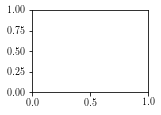

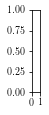

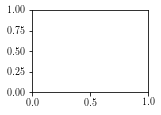

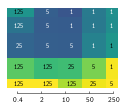

In [9]:
paramX = 1

# Get heatmap for each paramX option
error_heatmaps = []
Tmultiplier_options = [1, 5, 25, 125]
for Tmultiplier in Tmultiplier_options:
    error_heatmap = get_error_heatmap_for_Tmultiplier(directory,  basename, 
                                              angular_noise_std=angular_noise_std,
                                              Tmultiplier=Tmultiplier,
                                              phi_alignment=phi_alignment,
                                              paramX=paramX)
    error_heatmaps.append(error_heatmap)

# Get the best paramX option and assocated heatmap
best = np.zeros_like(error_heatmaps[0])
opt = np.argmin(error_heatmaps, axis=0)

for i in range(best.shape[0]):
    for j in range(best.shape[1]):
        best[i,j] = error_heatmaps[opt[i,j]][i,j]

# get axes
layout = fifi.svg_to_axes.FigureLayout(fififig, 
                                       autogenlayers=True, make_mplfigures=True, hide_layers=[])
ax = layout.axes[('optimal_T', 'optimal_T')]

# Plot the optimal heatmap
r = plot_error_heatmap(best, directory, basename, angular_noise_std=angular_noise_std, 
                           Tmultiplier=Tmultiplier, paramX=paramX, use='median',
                           phi_alignment=phi_alignment,
                               show_xspine=True, show_yspine=False,
                               show_contour=False, show_ellipse=False, ax=ax, show_turns_per_tau_line=False)
tau_opt, psifreq_opt, error_opt, X3, Y3, Z3, ellipse_tau, ellipse_freq = r
taus = [0.45, 3, 15, 65, 230]
turning_freqs = [.0105, .032, .13, .5, 1.25]
for i in range(best.shape[0]):
    for j in range(best.shape[1]):
        if i == best.shape[1]-1:
            verticalalignment = 'center'
        else:
            verticalalignment = 'center'
        if j == best.shape[0]-1:
            horizontalalignment = 'center'
        else:
            horizontalalignment = 'center'

        if best[i,j] > np.pi/8.:
            color = 'black'
        else:
            color = 'white'
        ax.text(taus[j], turning_freqs[i], str(Tmultiplier_options[opt[i,j]]), 
                color=color, fontsize=6, fontweight='bold',
                horizontalalignment=horizontalalignment,
                verticalalignment=verticalalignment)

layout.append_figure_to_layer(layout.figures['optimal_T'], 'optimal_T', cleartarget=True)
layout.write_svg(fififig)

# Display

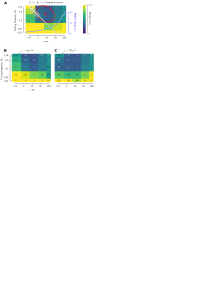

In [10]:
from IPython.display import display,SVG
display(SVG(fififig))